<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/Moore's_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/chip_dataset.csv')
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


Checking for missing values

In [4]:
missing_percentage = (df.isnull().sum()/len(df)) * 100
print(missing_percentage)

Product                   0.000000
Type                      0.000000
Release Date              4.024267
Process Size (nm)         0.000000
TDP (W)                   8.837209
Die Size (mm^2)           7.118301
Transistors (million)    11.223458
Freq (GHz)                8.837209
Foundry                  12.436805
Vendor                    0.000000
FP16 GFLOPS              83.822042
FP32 GFLOPS              65.925177
FP64 GFLOPS              74.155713
dtype: float64


In [5]:
df.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [6]:
df.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

**Using Missigno**

In [7]:
import missingno as msno

Bar Chart

<Axes: >

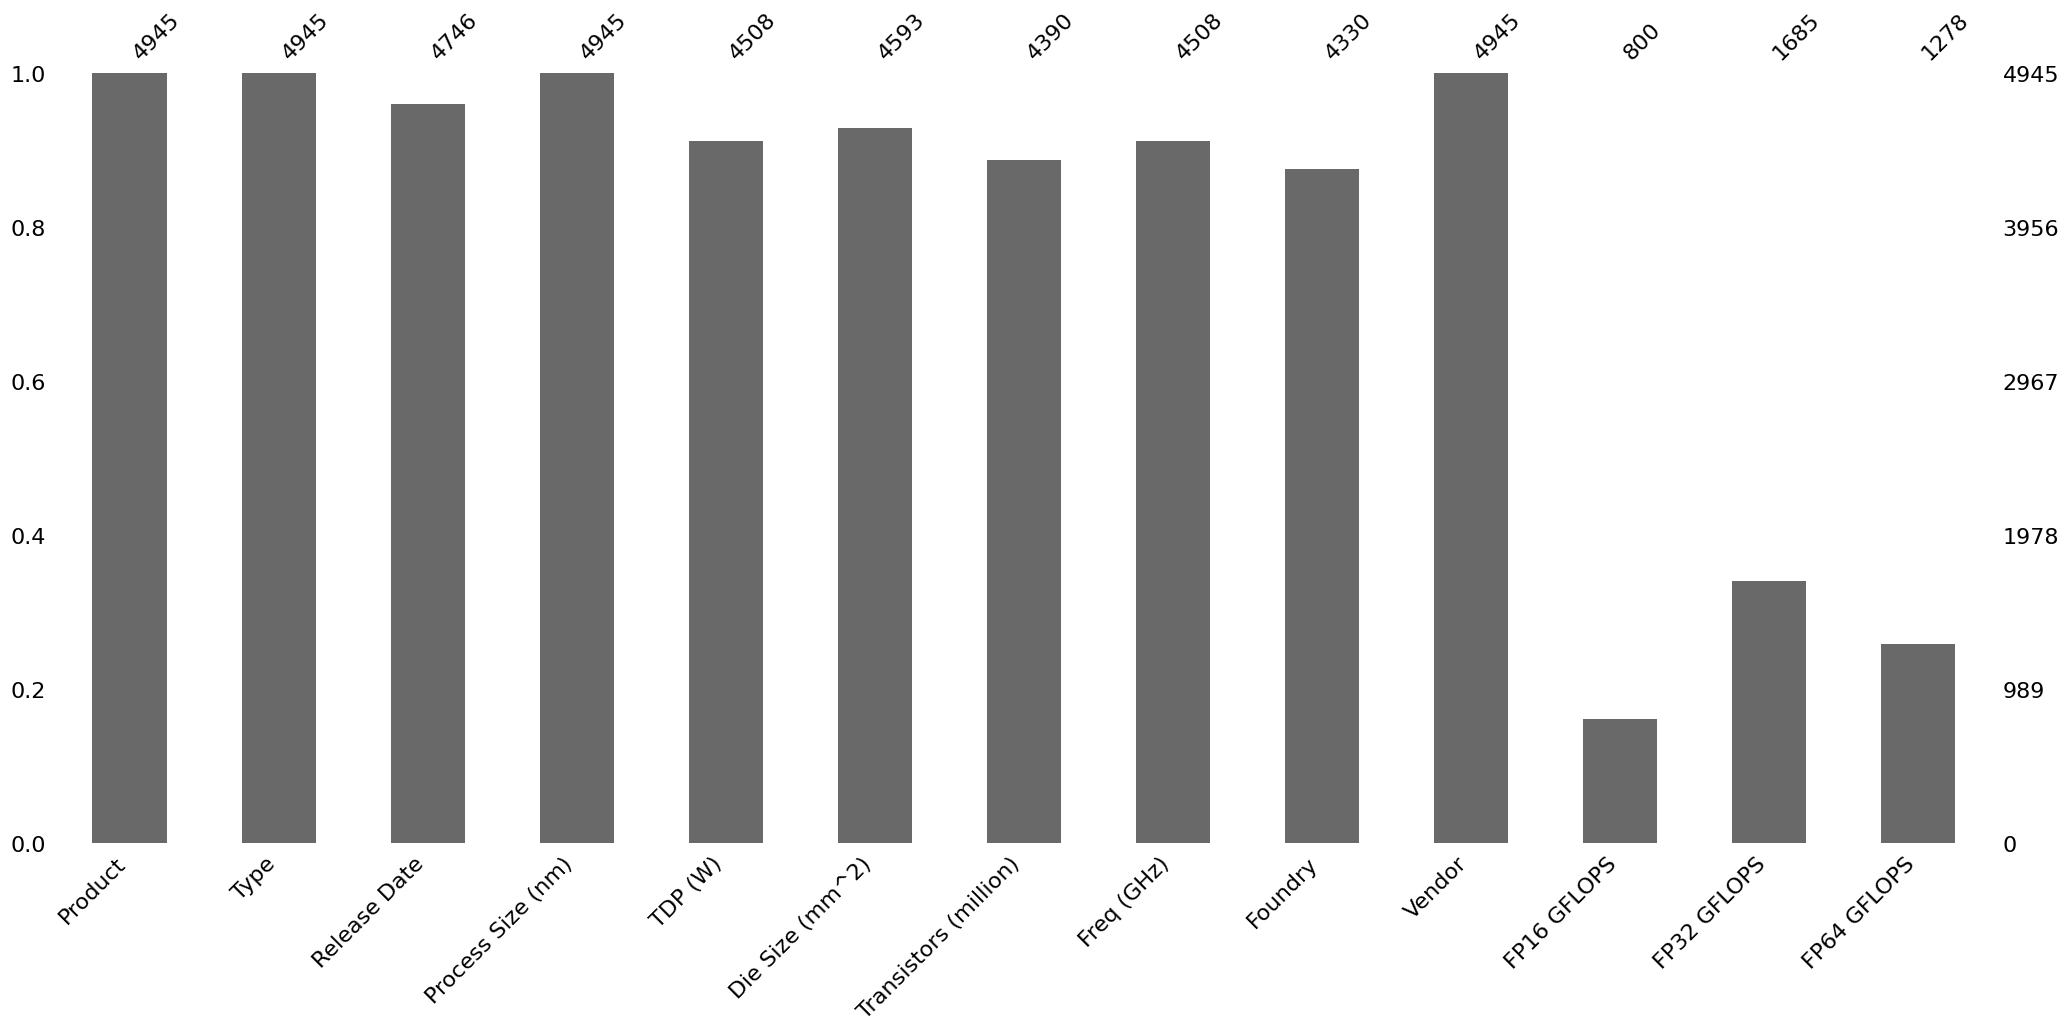

In [8]:
msno.bar(df)

<Axes: >

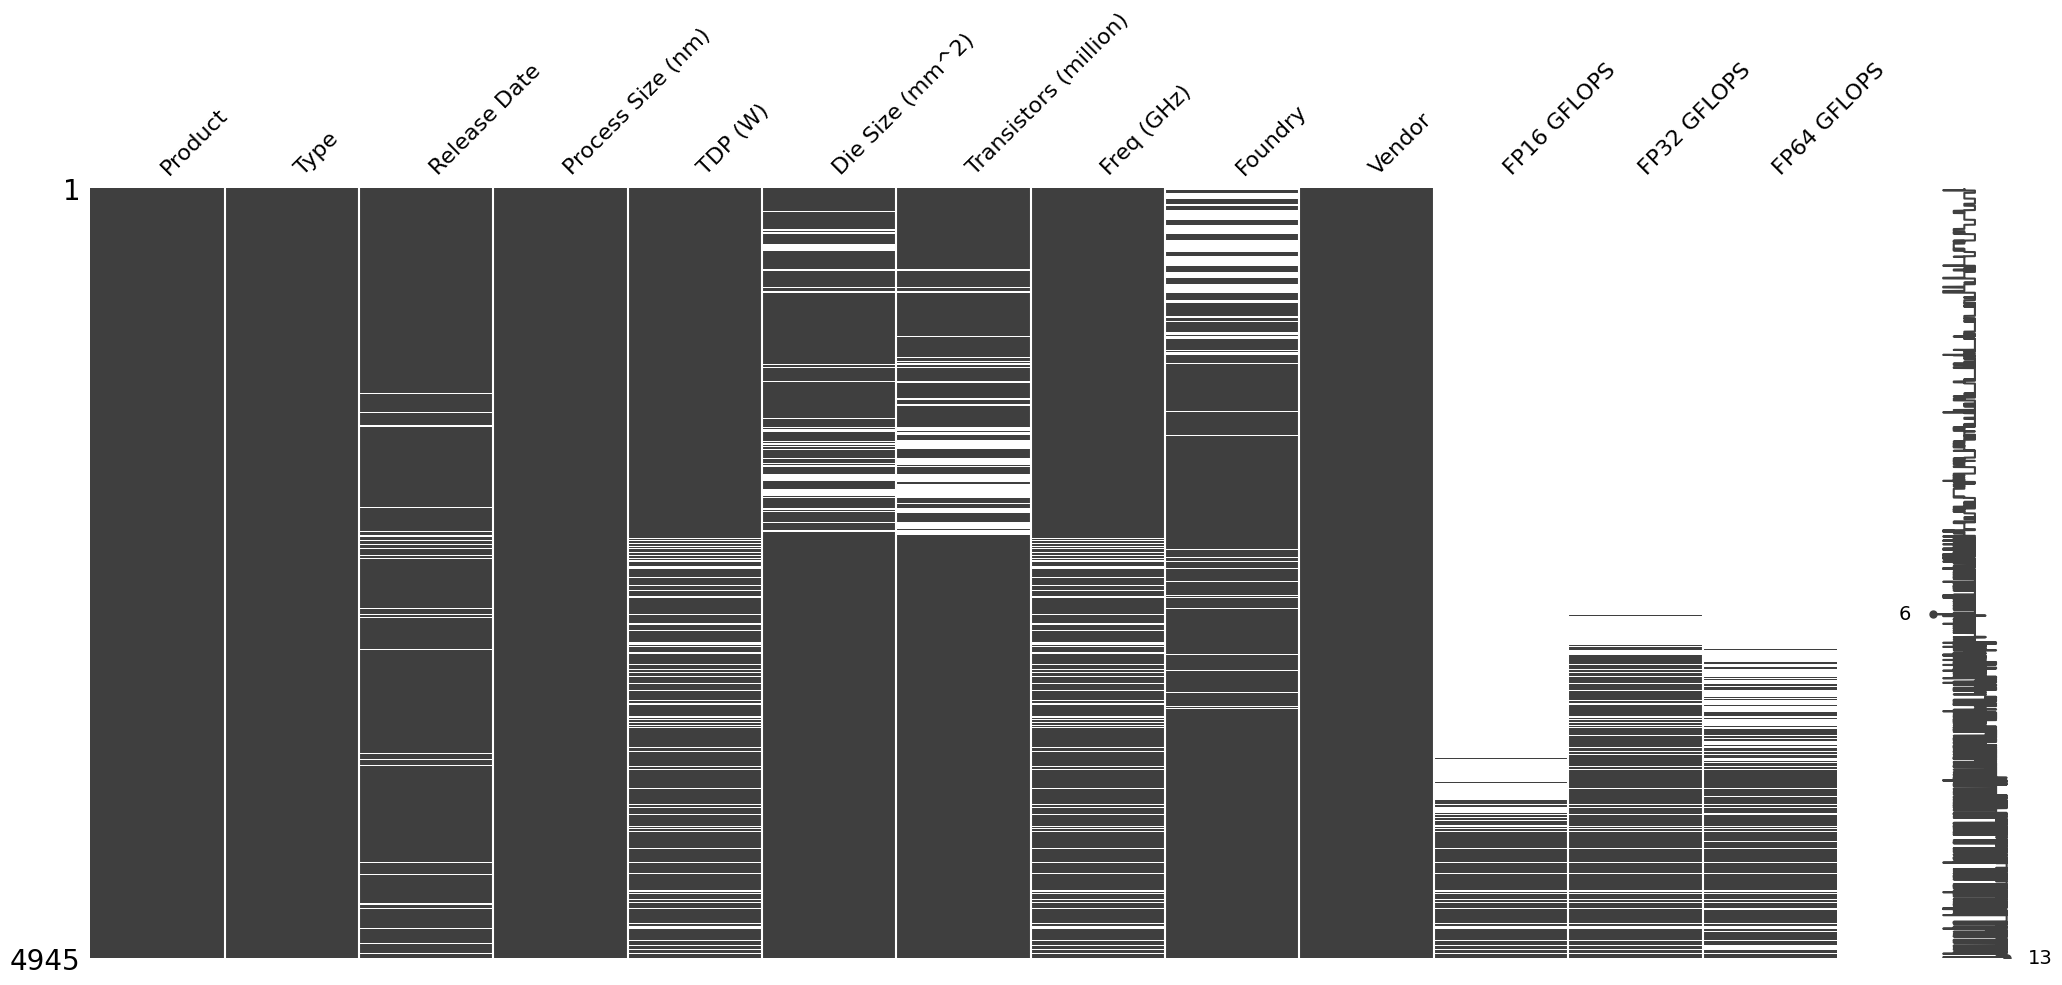

In [9]:
msno.matrix(df)

<Axes: >

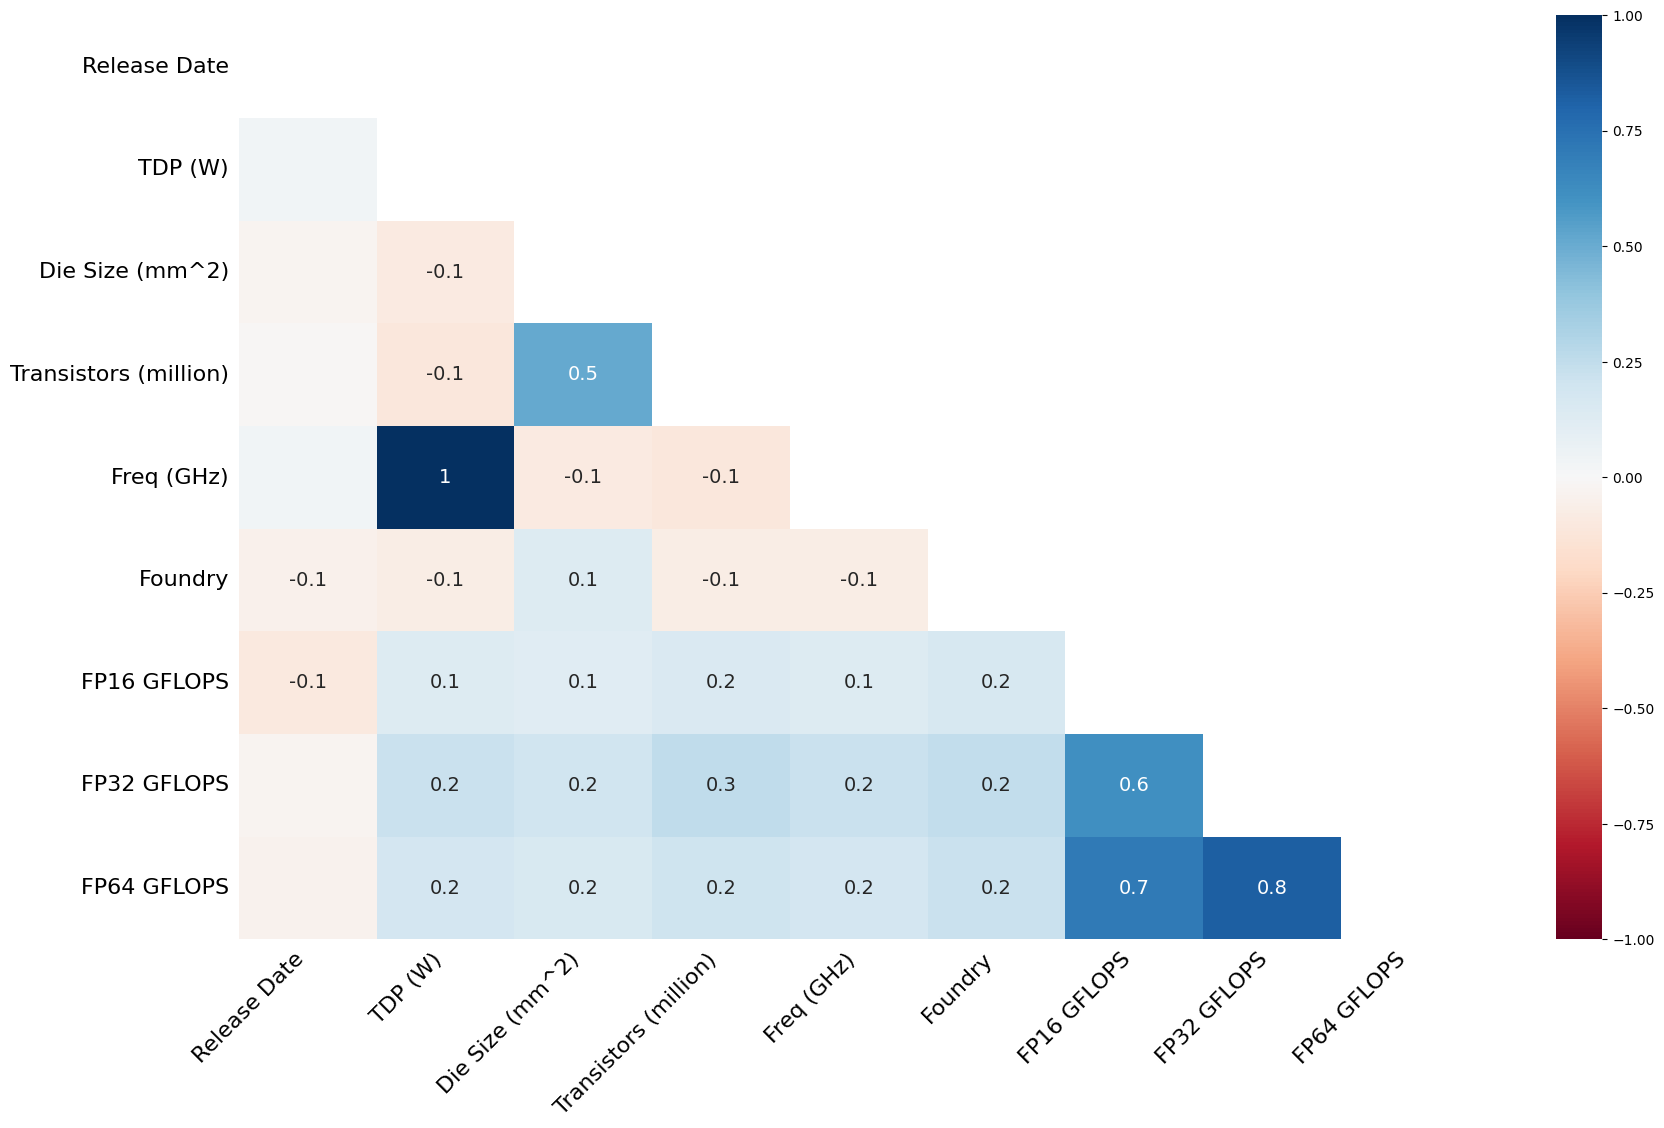

In [10]:
msno.heatmap(df)

<Axes: >

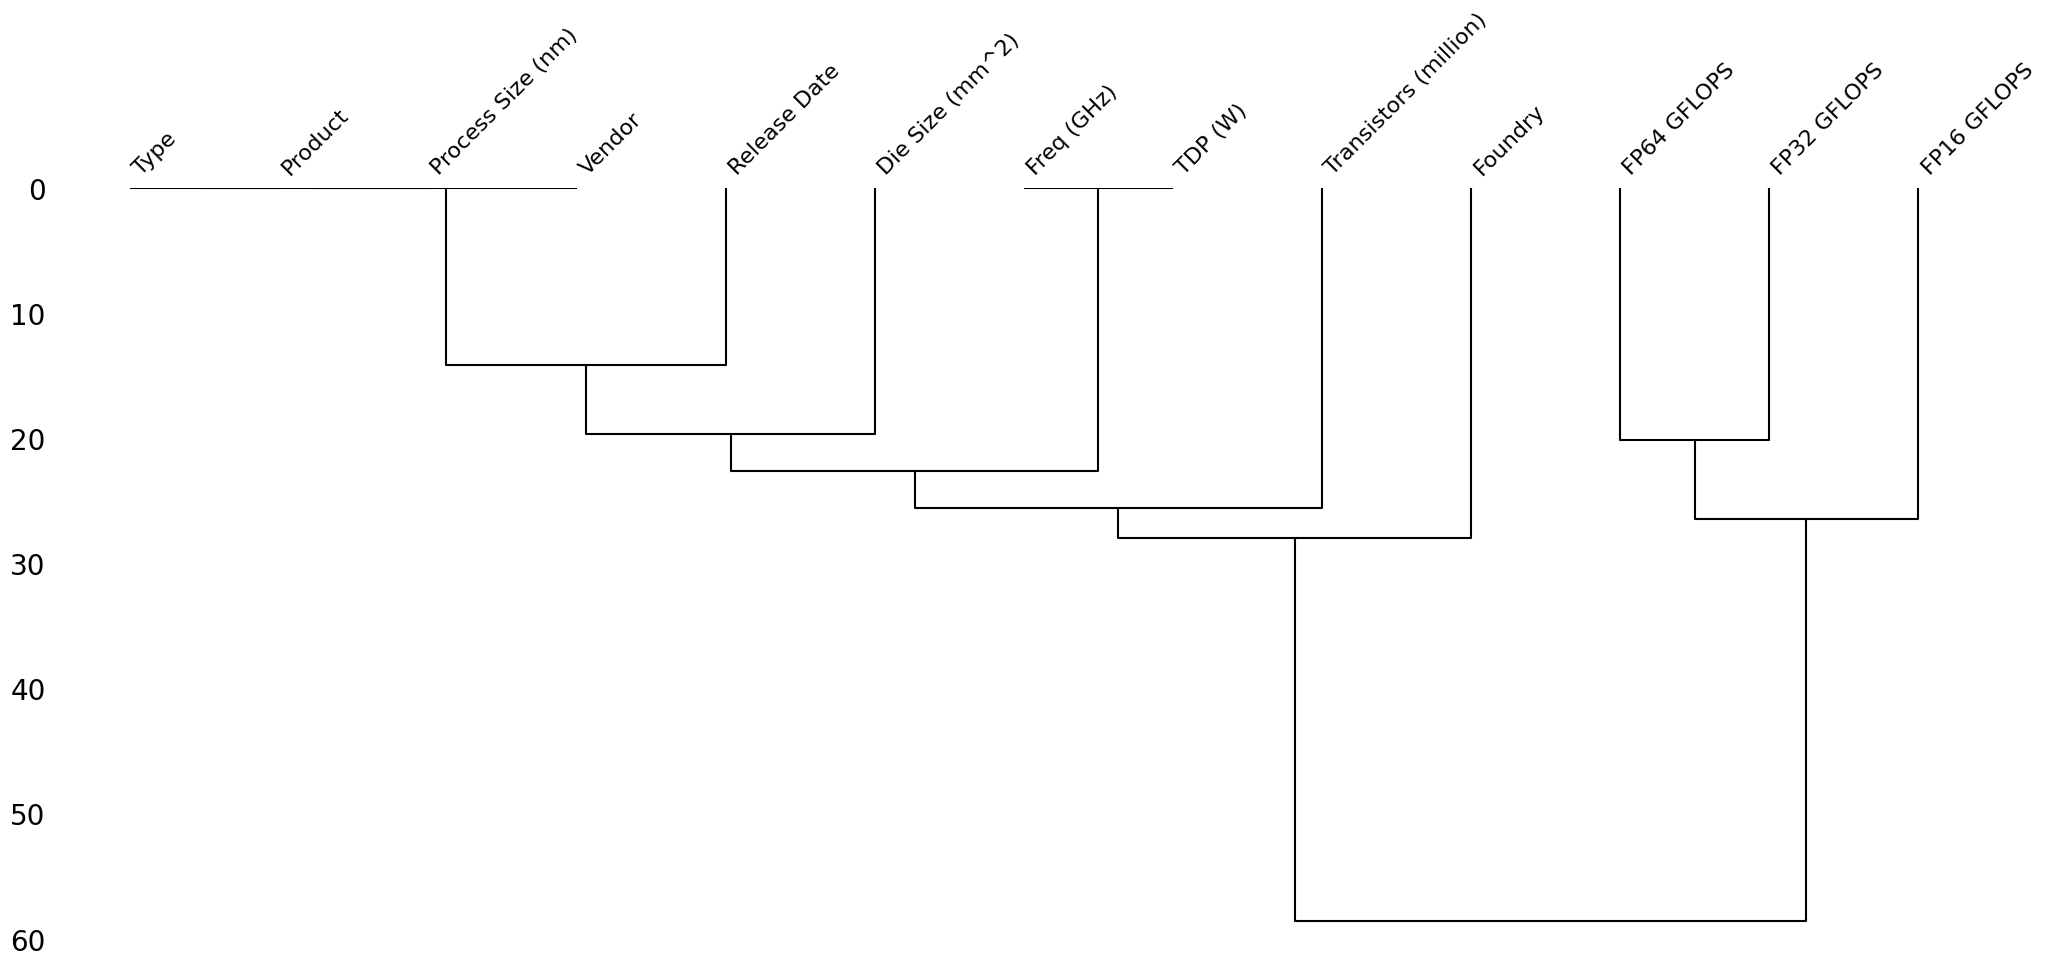

In [11]:
msno.dendrogram(df)

Since the percentage of the following columns is greater than 50% am dropping them:'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'

In [12]:
columns_to_drop = ['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']
df.drop(columns=columns_to_drop, inplace= True)

 Changing the dtype of the release date to datetime datatype

In [13]:

df['Release Date'] = pd.to_datetime(df['Release Date'])

<ipython-input-13-5542b5313a54>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


Performing a forward fill since I have noticed that the dates are following a chronological order and it could be missing completely at random

In [14]:

df['Release Date'].fillna(method='ffill', inplace= True)


Working on the foundry column I discovered some values were missing but it was the type missing not at random, I thought maybe some companies  did not want all their foundry to be known. So i used some domain knowledge after research.

In [15]:
df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,2024-01-08,8,80,200,8700,1042.0,Samsung,NVIDIA
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220,294,35800,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285,379,45900,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320,379,45900,2295.0,TSMC,NVIDIA


In [16]:
df['Foundry'].unique()

array([nan, 'Intel', 'TSMC', 'Fujitsu', 'GlobalFoundries', 'IBM', 'NEC',
       'UMC', 'Sony', 'Samsung', 'Renesas'], dtype=object)

In [17]:
df['Vendor'].unique()

array(['AMD', 'Intel', 'VIA', '3dfx', 'ATI', 'Matrox', 'NVIDIA', 'Sony',
       'XGI'], dtype=object)

In [18]:
df['Foundry'].value_counts()

Foundry
TSMC               2202
Intel              1444
GlobalFoundries     433
Samsung             132
UMC                  85
Sony                 18
Fujitsu               6
IBM                   4
NEC                   4
Renesas               2
Name: count, dtype: int64

In [19]:
df['Vendor'].value_counts()

Vendor
AMD       1689
Intel     1472
NVIDIA    1191
ATI        499
Matrox      26
XGI         21
3dfx        20
Sony        14
VIA         13
Name: count, dtype: int64

In [20]:
foundry_vendor = df[['Foundry', 'Vendor']]
foundry_vendor

,Foundry,Vendor
0,NaN,AMD
1,NaN,AMD
2,NaN,AMD
3,NaN,AMD
4,NaN,AMD
...,...,...
4940,Samsung,NVIDIA
4941,TSMC,NVIDIA
4942,TSMC,NVIDIA
4943,TSMC,NVIDIA


In [21]:
print(foundry_vendor.groupby('Vendor')['Foundry'].apply(lambda x:x.isna().sum()))

Vendor
3dfx        0
AMD       535
ATI        43
Intel       2
Matrox      0
NVIDIA     35
Sony        0
VIA         0
XGI         0
Name: Foundry, dtype: int64


In [22]:
ati = foundry_vendor[foundry_vendor['Vendor']=='ATI']
ati

,Foundry,Vendor
2247,TSMC,ATI
2248,TSMC,ATI
2249,IBM,ATI
2250,IBM,ATI
2251,IBM,ATI
...,...,...
3472,TSMC,ATI
3473,TSMC,ATI
3586,TSMC,ATI
3587,TSMC,ATI


In [23]:
def impute_foundry(df):
  # Mapping vendors to their corresponding foundries
  vendor_to_foundry = {
      'AMD' : 'TSMC',
      'ATI' : 'TSMC',
      'Intel' : 'Intel',
      'NVIDIA' : 'TSMC'
  }
  df['Foundry'] = df.apply(lambda row: vendor_to_foundry[row['Vendor']] if pd.isna(row['Foundry']) else row['Foundry'], axis=1)
  return foundry_vendor

df_imputed = impute_foundry(df)
print(df_imputed)

      Foundry  Vendor
0         NaN     AMD
1         NaN     AMD
2         NaN     AMD
3         NaN     AMD
4         NaN     AMD
...       ...     ...
4940  Samsung  NVIDIA
4941     TSMC  NVIDIA
4942     TSMC  NVIDIA
4943     TSMC  NVIDIA
4944     TSMC  NVIDIA

[4945 rows x 2 columns]


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4508 non-null   object        
 5   Die Size (mm^2)        4593 non-null   object        
 6   Transistors (million)  4390 non-null   object        
 7   Freq (GHz)             4508 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 386.5+ KB


Converting these columns to numerical format: 'Process Size (nm)', 'TDP (W)','Die Size (mm^2)', 'Transistors (million) into numerical form

In [25]:
df['Process Size (nm)'].unique()

array(['180', '90', '130', '65', '45', '32', '40', '22', '28', '14', '12',
       '10', '7', '16', '6', '5', '4', '250', '150', '110', '0', '80',
       '55', '14+', '14++', '14+++', '20', '10+', '8'], dtype=object)

In [26]:
import re
def remove_additional_signs(value):
  return re.sub(r'\D', '', value)

df['Process Size (nm)'] = df['Process Size (nm)'].apply(remove_additional_signs)
df['Process Size (nm)'] = pd.to_numeric(df['Process Size (nm)'])


In [27]:
df['Die Size (mm^2)'] = pd.to_numeric(df['Die Size (mm^2)'], errors='coerce')


In [28]:
df['Transistors (million)'] = pd.to_numeric(df['Transistors (million)'], errors='coerce')


I have also noticed the TDP(W), thermal design power and the Freq(GHz) are missing the same number of values in the dataset so I thought it is of the type missing at random.

In [29]:
df['TDP (W)'] = pd.to_numeric(df['TDP (W)'], errors='coerce')


In [30]:
df['Freq (GHz)'] = pd.to_numeric(df['Freq (GHz)'], errors='coerce')


Using scikit learn KNNImputer

In [31]:
from sklearn.impute import KNNImputer

In [32]:
columns_to_impute = ['TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)']
data_to_impute = df[columns_to_impute]
data_to_impute.head()

,TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz)
0,54.0,120.0,37.0,1000.0
1,54.0,120.0,37.0,1000.0
2,60.0,120.0,37.0,1100.0
3,63.0,120.0,37.0,1133.0
4,66.0,120.0,37.0,1200.0


In [33]:
data_to_impute.isna().sum()

TDP (W)                  891
Die Size (mm^2)          716
Transistors (million)    806
Freq (GHz)               437
dtype: int64

In [34]:
imputer = KNNImputer(n_neighbors=2)

In [35]:
imputed_data = imputer.fit_transform(data_to_impute)

In [36]:
df[columns_to_impute]= imputed_data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   int64         
 4   TDP (W)                4945 non-null   float64       
 5   Die Size (mm^2)        4945 non-null   float64       
 6   Transistors (million)  4945 non-null   float64       
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 386.5+ KB


In [38]:
df.to_csv('cleaned_df.csv', index=False)

Moore's Law still holds, especially in GPUs
Moore's Law, which states that the number of transistors on a microchip doubles approximately every two years, thereby increasing computational power.


In [39]:
data = pd.read_csv('/content/cleaned_df.csv')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4945 non-null   object 
 3   Process Size (nm)      4945 non-null   int64  
 4   TDP (W)                4945 non-null   float64
 5   Die Size (mm^2)        4945 non-null   float64
 6   Transistors (million)  4945 non-null   float64
 7   Freq (GHz)             4945 non-null   float64
 8   Foundry                4945 non-null   object 
 9   Vendor                 4945 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 386.5+ KB


In [41]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,TSMC,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,TSMC,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,TSMC,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,TSMC,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,TSMC,AMD


In [42]:
data.describe()

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz)
count,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000
mean,50.862487,86.044239,210.046176,4691.938585,1577.503247
std,48.382904,93.582168,146.185148,11444.226837,1071.355025
min,0.000000,1.000000,6.000000,8.000000,100.000000
25%,14.000000,29.000000,112.000000,160.000000,625.000000
50%,28.000000,64.000000,169.000000,950.000000,1333.000000
75%,80.000000,105.000000,257.000000,4515.500000,2400.000000
max,250.000000,2400.000000,1280.000000,153000.000000,4700.000000


In [43]:
import pandas as pd
data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Year'] = data['Release Date'].dt.year
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,Year
0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,TSMC,AMD,2000
1,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,TSMC,AMD,2000
2,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,TSMC,AMD,2000
3,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,TSMC,AMD,2000
4,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,TSMC,AMD,2000


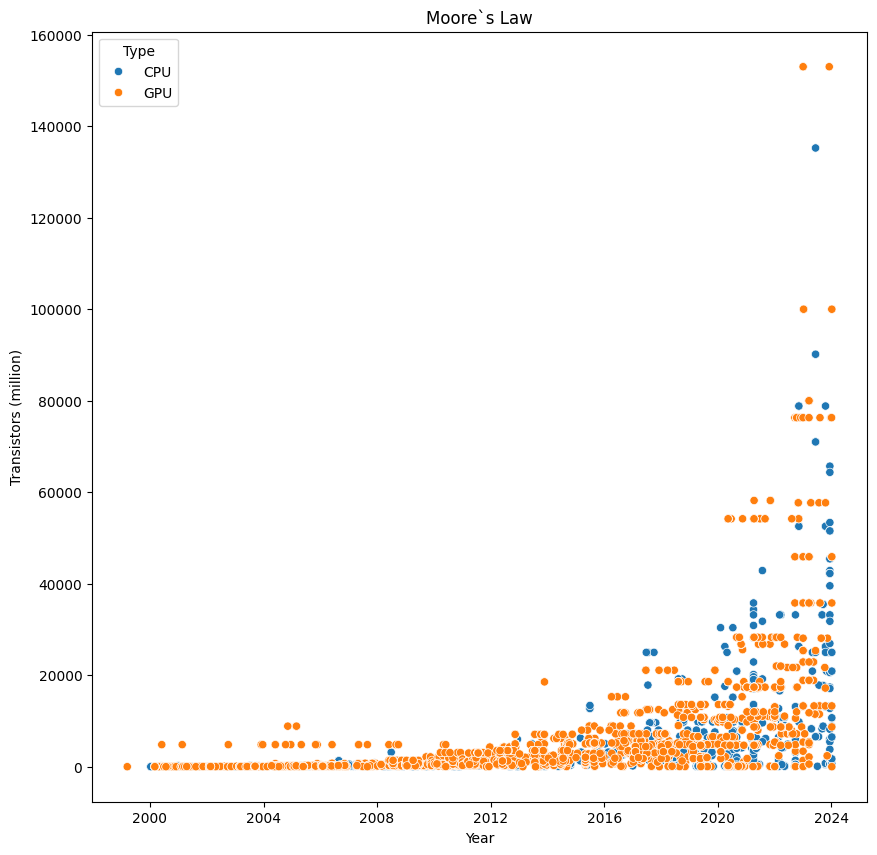

In [44]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = data, x='Release Date', y='Transistors (million)', hue='Type')

plt.title('Moore`s Law')
plt.ylabel('Transistors (million)')
plt.xlabel('Year')
plt.show()

Dannard Scaling is still valid in general.  It states that as transistors get smaller, their power density stays constant, so that the power use stays in proportion with area (both voltage and current scale down with length)

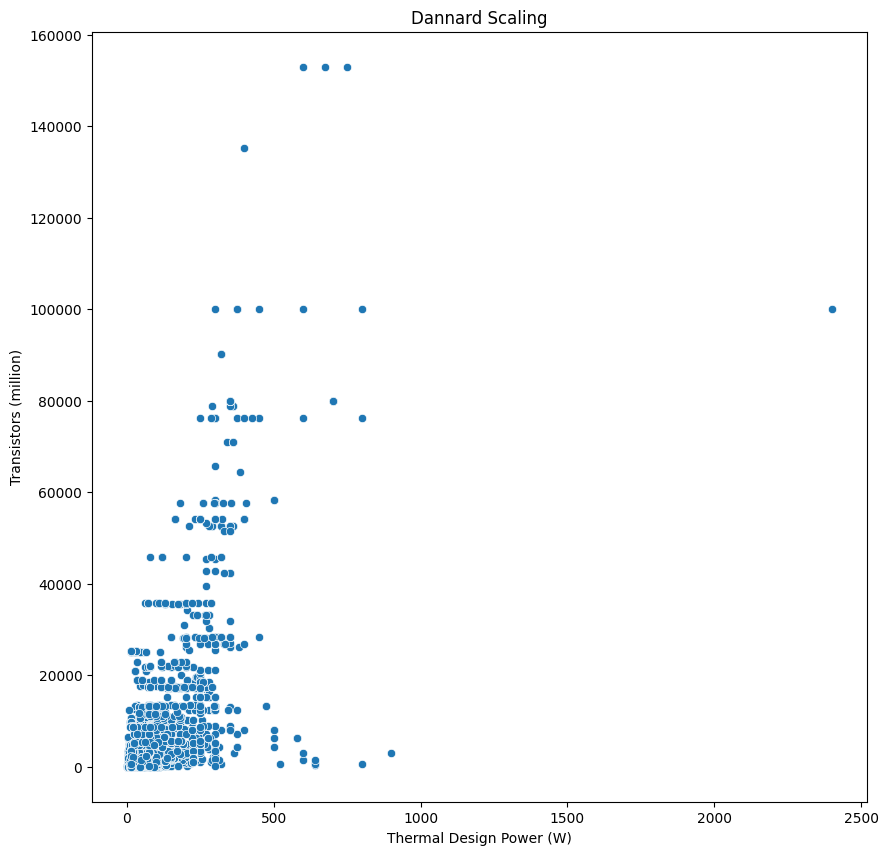

In [45]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = data, x='TDP (W)', y='Transistors (million)')

plt.title('Dannard Scaling')
plt.ylabel('Transistors (million)')
plt.xlabel('Thermal Design Power (W)')
plt.show()

CPUs have higher frequencies, but GPUs are catching up.

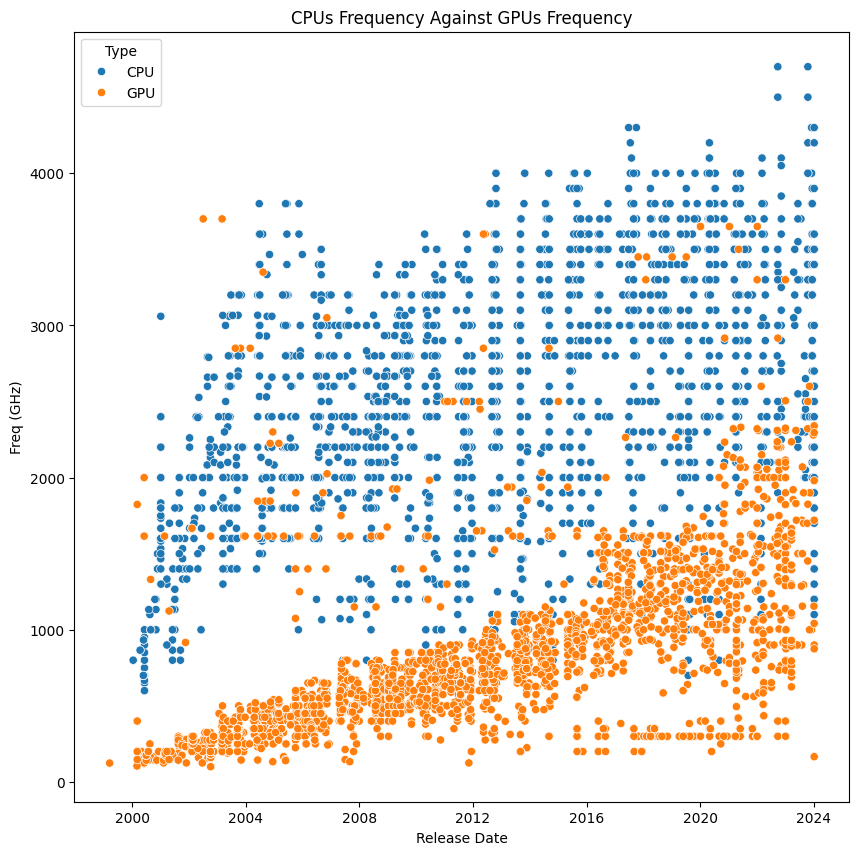

In [46]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = data, x='Release Date', y='Freq (GHz)', hue='Type')

plt.title('CPUs Frequency Against GPUs Frequency')
plt.ylabel('Freq (GHz)')
plt.xlabel('Release Date')
plt.show()

GPU performance doubles every 1.5 years.

In [47]:
gpu_data = data[data['Type']=='GPU']
gpu_data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,Year
2231,3dfx Voodoo4 4000 AGP,GPU,2024-01-08,250,15.0,112.0,14.0,166.0,TSMC,3dfx,2024
2232,3dfx VSA-100,GPU,2000-06-22,250,15.0,112.0,14.0,166.0,TSMC,3dfx,2000
2233,3dfx Voodoo4 4500 AGP,GPU,2000-10-13,250,15.0,112.0,14.0,166.0,TSMC,3dfx,2000
2234,3dfx Voodoo4 4500 PCI,GPU,2000-10-13,250,15.0,112.0,14.0,166.0,TSMC,3dfx,2000
2235,3dfx Voodoo4 4800 AGP,GPU,2000-10-13,250,15.0,112.0,14.0,166.0,TSMC,3dfx,2000


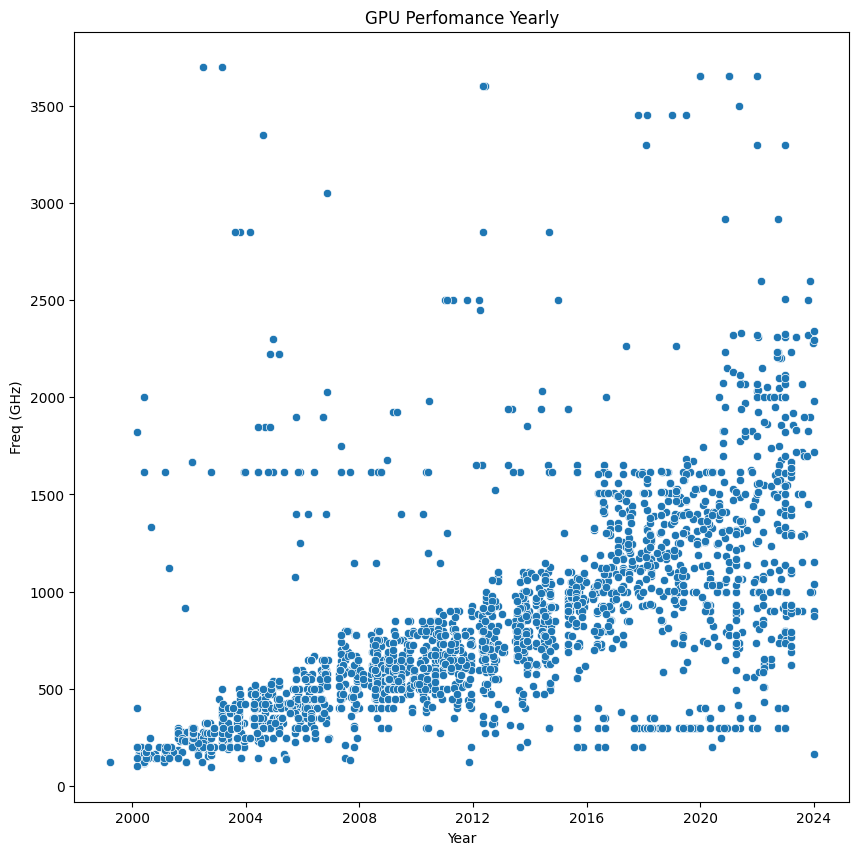

In [48]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = gpu_data, x='Release Date', y='Freq (GHz)')

plt.title('GPU Perfomance Yearly')
plt.ylabel('Freq (GHz)')
plt.xlabel('Year')
plt.show()

GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

In [49]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,Year
0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,TSMC,AMD,2000
1,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,TSMC,AMD,2000
2,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,TSMC,AMD,2000
3,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,TSMC,AMD,2000
4,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,TSMC,AMD,2000


In [75]:
process = data.groupby('Vendor')['Process Size (nm)'].describe()
process

,count,mean,std,min,25%,50%,75%,max
Vendor,,,,,,,,
3dfx,20.0,215.000000,35.909242,180.0,180.0,215.0,250.0,250.0
AMD,1689.0,41.631735,40.392028,4.0,12.0,28.0,55.0,180.0
ATI,499.0,100.150301,43.155266,40.0,55.0,90.0,130.0,180.0
Intel,1472.0,37.347147,39.933405,6.0,14.0,22.0,45.0,180.0
Matrox,26.0,125.769231,66.823533,0.0,105.0,150.0,180.0,180.0
NVIDIA,1191.0,53.285474,48.667600,4.0,12.0,40.0,80.0,250.0
Sony,14.0,110.285714,73.832897,32.0,65.0,90.0,157.5,250.0
VIA,13.0,75.538462,41.427880,16.0,65.0,65.0,130.0,130.0
XGI,21.0,128.095238,6.015852,110.0,130.0,130.0,130.0,130.0


In [79]:
process_data = data[['Vendor', 'Process Size (nm)']]
process_data.sort_values(ascending=False)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [78]:
process_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vendor             4945 non-null   object
 1   Process Size (nm)  4945 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.4+ KB


TSMC makes the highest number of chips in the world

In [72]:
foundry_counts = data['Foundry'].value_counts()
foundry_counts_df = foundry_counts.reset_index()
foundry_counts_df.columns =['Foundry', 'Count']
foundry_counts_df = foundry_counts_df.sort_values(by='Count', ascending=False)


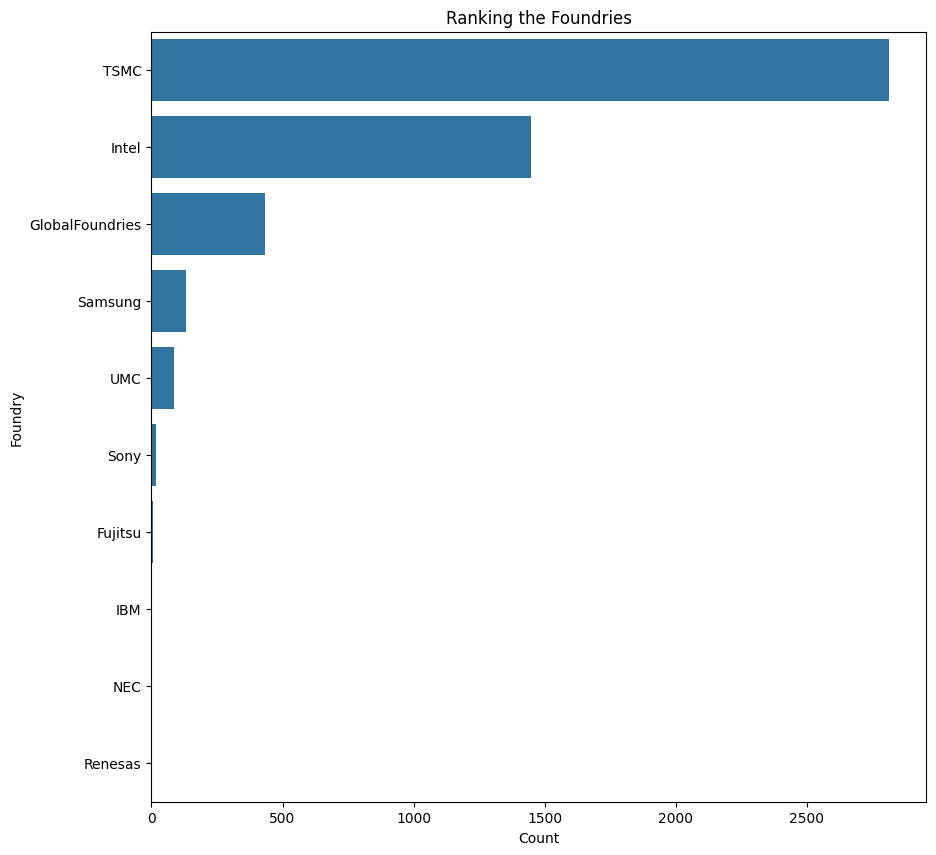

In [73]:
plt.figure(figsize=(10, 10))
sns.barplot(data=foundry_counts_df, x='Count', y='Foundry')
plt.xlabel('Count')
plt.ylabel('Foundry')
plt.title('Ranking the Foundries')
plt.show()

In [ ]:
print(data['Foundry'].value_counts())